In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "C:\\Users\\Hp\\Desktop\\LA+flytipping+league+table+data+2021-22+to+2022-23_revised.csv"
df = pd.read_csv(file_path)

# Displaying the first few rows and the summary of the dataframe
head = df.head()
describe = df.describe(include='all')

# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the head and summary statistics
print(head)
print(describe)
print(missing_values)

      Year   ONS Code       LA Name         Region  Total Incidents  \
0  2021-22  E07000223          Adur     South East              845   
1  2021-22  E07000026     Allerdale     North West             1474   
2  2021-22  E07000032  Amber Valley  East Midlands              219   
3  2021-22  E07000224          Arun     South East             1713   
4  2021-22  E07000170      Ashfield  East Midlands              812   

   Total Actions  Total Fixed Penalty Notice Actions  Prosecution Actions  \
0            644                                   3                    0   
1           1494                                  15                    0   
2             98                                   0                    0   
3             37                                   0                    0   
4           1380                                  90                    0   

  FPNs per incident Rank FPN per incidents  Rank FPN  
0            0.0036                    224       224  


In [2]:
# Checking the data types and missing values in the dataframe
data_types = df.dtypes
missing_values = df.isnull().sum()

# Displaying the data types and missing values
print(data_types)
print(missing_values)

Year                                  object
ONS Code                              object
LA Name                               object
Region                                object
Total Incidents                        int64
Total Actions                          int64
Total Fixed Penalty Notice Actions     int64
Prosecution Actions                    int64
FPNs per incident                     object
Rank FPN per incidents                object
Rank FPN                               int64
dtype: object
Year                                  0
ONS Code                              0
LA Name                               0
Region                                0
Total Incidents                       0
Total Actions                         0
Total Fixed Penalty Notice Actions    0
Prosecution Actions                   0
FPNs per incident                     0
Rank FPN per incidents                0
Rank FPN                              0
dtype: int64


In [3]:
# Checking for unique values in categorical columns to understand the data better
unique_values = {col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}

# Displaying unique values for categorical columns
print(unique_values)

{'Year': array(['2021-22', '2022-23'], dtype=object), 'ONS Code': array(['E07000223', 'E07000026', 'E07000032', 'E07000224', 'E07000170',
       'E07000105', 'E07000200', 'E09000002', 'E09000003', 'E08000016',
       'E07000027', 'E07000066', 'E07000084', 'E07000171', 'E06000022',
       'E06000055', 'E09000004', 'E08000025', 'E07000129', 'E06000008',
       'E06000009', 'E07000033', 'E08000001', 'E07000136', 'E06000058',
       'E06000036', 'E08000032', 'E07000067', 'E07000143', 'E09000005',
       'E07000068', 'E06000043', 'E06000023', 'E07000144', 'E09000006',
       'E07000234', 'E07000095', 'E07000172', 'E06000060', 'E07000117',
       'E08000002', 'E08000033', 'E07000008', 'E09000007', 'E07000192',
       'E07000106', 'E07000028', 'E07000069', 'E06000056', 'E07000130',
       'E07000070', 'E07000078', 'E07000177', 'E06000049', 'E06000050',
       'E07000034', 'E07000225', 'E07000118', 'E09000001', 'E07000071',
       'E07000029', 'E06000052', 'E07000079', 'E06000047', 'E08000026'

C:\Users\Hp\AppData\Local\Temp\ipykernel_5472\2900225131.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Total Incidents', estimator=sum, ci=None)


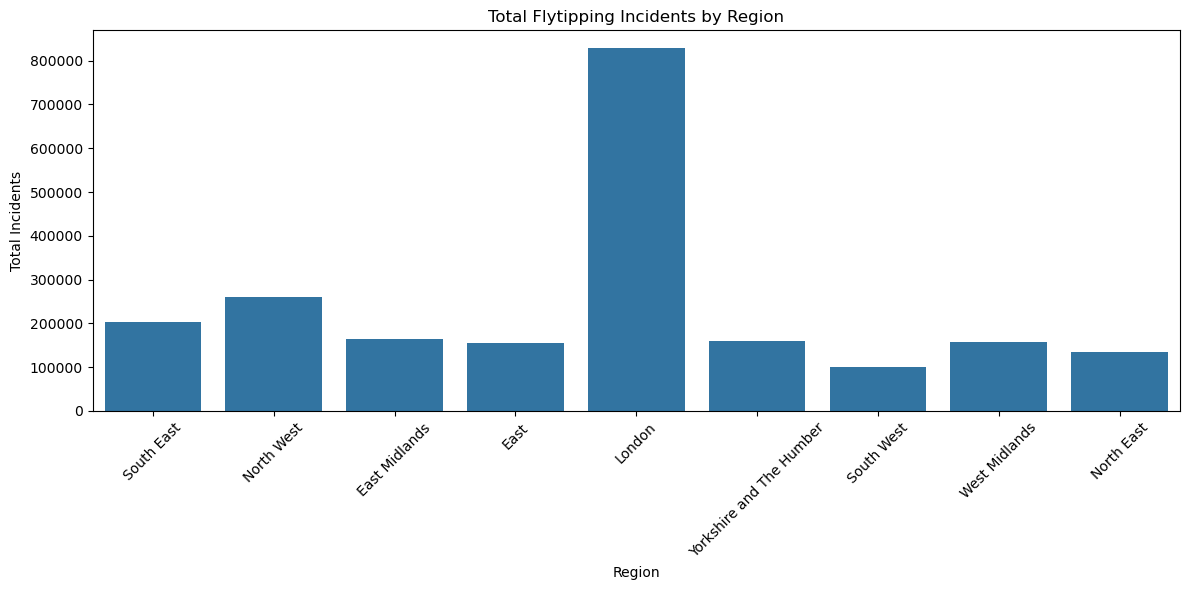

In [4]:
# Visualizing the total incidents by region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Total Incidents', estimator=sum, ci=None)
plt.title('Total Flytipping Incidents by Region')
plt.xticks(rotation=45)
plt.ylabel('Total Incidents')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

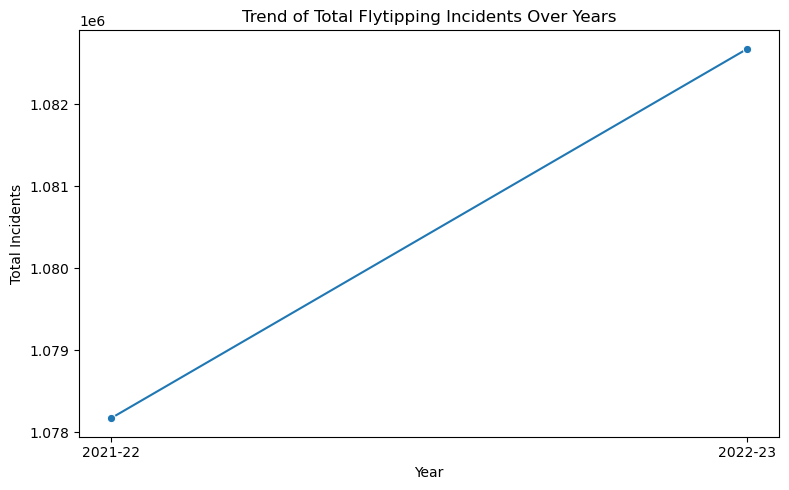

In [5]:
# Analyzing trends over the two years
# Grouping the data by Year and summing the Total Incidents
trend_data = df.groupby('Year')['Total Incidents'].sum().reset_index()

# Visualizing the trend of total incidents over the years
plt.figure(figsize=(8, 5))
sns.lineplot(data=trend_data, x='Year', y='Total Incidents', marker='o')
plt.title('Trend of Total Flytipping Incidents Over Years')
plt.ylabel('Total Incidents')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [6]:
# Comparing total incidents and actions taken for each local authority
# Pivoting the data to compare incidents and actions side by side
comparison_data = df.pivot_table(index='LA Name', columns='Year', values=['Total Incidents', 'Total Actions'], aggfunc='sum')
comparison_data.columns = ['_'.join(col).strip() for col in comparison_data.columns.values]
comparison_data.reset_index(inplace=True)

# Displaying the comparison data
print(comparison_data.head())

        LA Name  Total Actions_2021-22  Total Actions_2022-23  \
0          Adur                  644.0                  524.0   
1     Allerdale                 1494.0                 1423.0   
2  Amber Valley                   98.0                   96.0   
3          Arun                   37.0                  133.0   
4      Ashfield                 1380.0                 1766.0   

   Total Incidents_2021-22  Total Incidents_2022-23  
0                    845.0                   1014.0  
1                   1474.0                   1756.0  
2                    219.0                    178.0  
3                   1713.0                   2035.0  
4                    812.0                   1135.0  


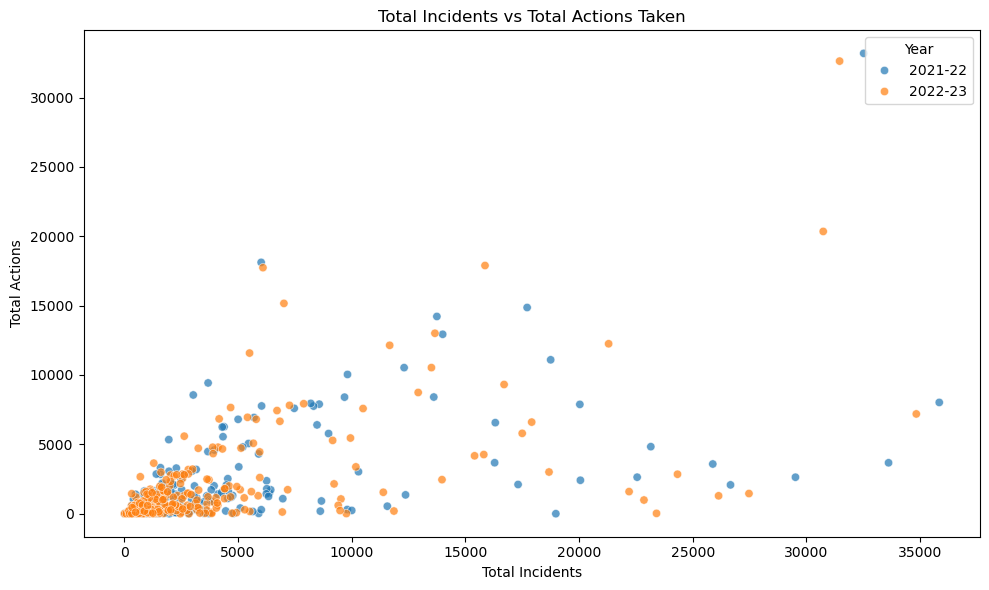

In [7]:
# Visualizing the relationship between Total Incidents and Total Actions taken
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Incidents', y='Total Actions', hue='Year', alpha=0.7)
plt.title('Total Incidents vs Total Actions Taken')
plt.xlabel('Total Incidents')
plt.ylabel('Total Actions')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5472\755790125.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Total Fixed Penalty Notice Actions', estimator=sum, ci=None)


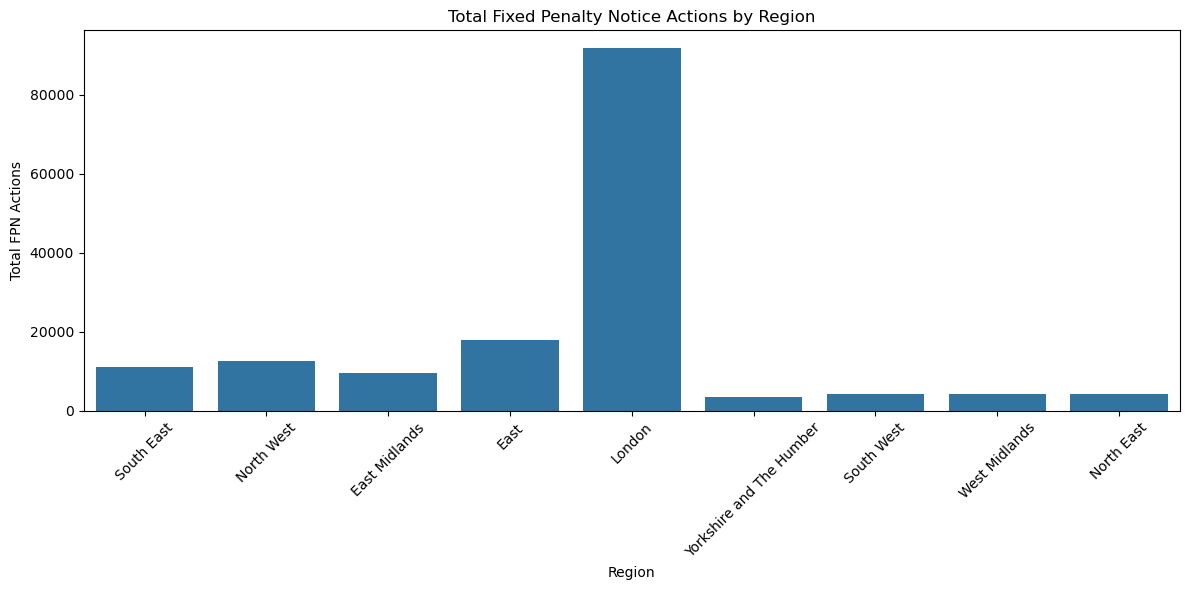

In [8]:
# Visualizing total fixed penalty notice actions by region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Total Fixed Penalty Notice Actions', estimator=sum, ci=None)
plt.title('Total Fixed Penalty Notice Actions by Region')
plt.xticks(rotation=45)
plt.ylabel('Total FPN Actions')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5472\3427032323.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year', y='Prosecution Actions', estimator=sum, ci=None)


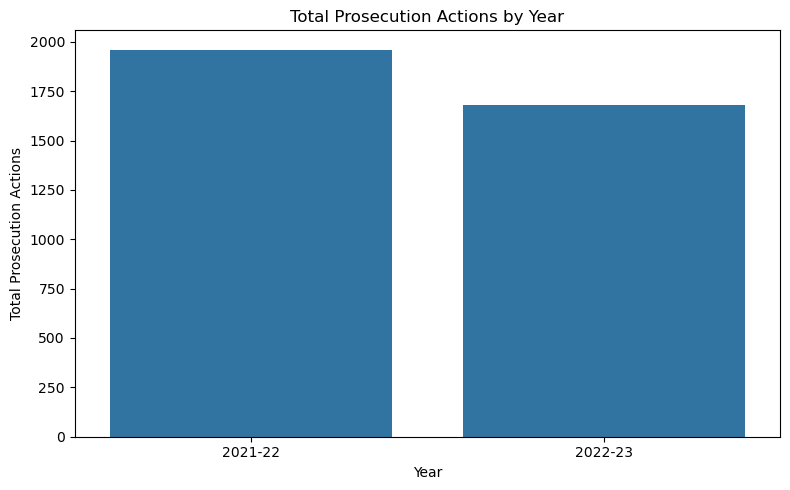

In [9]:
# Visualizing prosecution actions by year
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Year', y='Prosecution Actions', estimator=sum, ci=None)
plt.title('Total Prosecution Actions by Year')
plt.ylabel('Total Prosecution Actions')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [10]:
# Calculating the correlation between Total Incidents and various actions taken
correlation_data = df[['Total Incidents', 'Total Actions', 'Total Fixed Penalty Notice Actions', 'Prosecution Actions']].corr()

# Displaying the correlation matrix
print(correlation_data)

                                    Total Incidents  Total Actions  \
Total Incidents                            1.000000       0.593529   
Total Actions                              0.593529       1.000000   
Total Fixed Penalty Notice Actions         0.356300       0.549217   
Prosecution Actions                        0.144496       0.248659   

                                    Total Fixed Penalty Notice Actions  \
Total Incidents                                               0.356300   
Total Actions                                                 0.549217   
Total Fixed Penalty Notice Actions                            1.000000   
Prosecution Actions                                           0.277053   

                                    Prosecution Actions  
Total Incidents                                0.144496  
Total Actions                                  0.248659  
Total Fixed Penalty Notice Actions             0.277053  
Prosecution Actions                           

In [12]:
# Creating a pivot table to inspect the structure of total incidents by year for each local authority
incidents_pivot = df.pivot_table(index='LA Name', columns='Year', values='Total Incidents', aggfunc='sum')

# Displaying the pivot table structure
print(incidents_pivot.head())

Year          2021-22  2022-23
LA Name                       
Adur            845.0   1014.0
Allerdale      1474.0   1756.0
Amber Valley    219.0    178.0
Arun           1713.0   2035.0
Ashfield        812.0   1135.0
